In [ ]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# read datasets
df_credits = pd.read_csv("archive/tmdb_5000_credits.csv")
df_movies = pd.read_csv("archive/tmdb_5000_movies.csv")

Load in the datasets and check for first five rows

In [ ]:
df_credits.head()

In [ ]:
df_movies.head()

### Check the general structure of both the datasets

In [ ]:
# Check the shape of the first dataset
df_credits.shape

In [ ]:
# Check the shape of the second dataset
df_movies.shape

**df_credits has 4803 rows and 4 columns while df_mov has 4803 rows and 20 columns. Let's explore further**

In [ ]:
# Check for the duplicates in the first dataset
sum(df_credits.duplicated())

In [ ]:
# Check for the duplicates in the second dataset
sum(df_movies.duplicated())

**Both the datasets do not have any duplicate rows**

checking data type of datasets

In [ ]:
# Check for the datatypes of each variable in the first dataset
df_credits.dtypes

In [ ]:
# Check for the datatypes of each variable in the second dataset
df_movies.dtypes

`release_date` variable should be of the form datetime 

In [ ]:
# Check for unique values in each variable in the first dataset
df_credits.nunique()

**While there are 4803 movies in total, there are only 4800 unique titles which suggest the presence of duplicates**


In [ ]:
# Check for unique values in each variable in the second dataset
df_movies.nunique()

1. While there are 4803 movies in total, there are only 4800 unique titles and which suggest the presence of duplicates
2. There are 4800 titles but 4801 original titles which suggests further investigation in the 2 variables
3. There are 4802 unique popularity values instead of 4803 which suggests presence of duplicates
4. Status has only 3 unique values which needs further investigation to find if we need all the observations or some of them can be removed

In [ ]:
# Check for detailed info in the first dataset
df_credits.info()

In [ ]:
# Check for detailed info in the second dataset
df_movies.info()

**Presence of null values can be seen in some variables namely - `homepage`, `overview`, `release_date`, `runtime`, and `tagline`**

In [ ]:
df_movies.status.value_counts()

**It can be seen that there are almost all the obseravtions which belong to `Released` status. Therefore, we need to limit the dataset to this value of status only as including other status types also makes no sense**


In [ ]:
df_movies.isnull().sum()

**There are huge number of null counts in `homepage` followed by `tagline`. These are the variables which we might not even require in our further analysis**

##### As we saw above `original_title` and `title` unique values did not match, so we need to explore them further


In [ ]:
# Check the instances where original title do not match with title column
df_movies[['original_title', 'title']].query('original_title != title')

**So, we saw that there are 261 instances where `original_title` doesn't match with `title`. So, it's possible that number of unique values differ in both the columns. Therefore, we are on the same place as before that we need to explore `title` column further which we will do in the _Further Exploration and Cleaning_ section**

### Further Exploration and Cleaning 

#### Issues to be resolved:
1. Filter df_movies to the observations with Released status in the new dataset cl_mov which is always a good decision because we might need the original dataset at any time in the analysis

2. Drop the unnecessary columns

3. Drop the null observations in any variable

4. Explore and check title variable further for duplicates in df_movies

5. change the data type of the `release_date` to datetime in df_movies

6. Try to resolve the variables that find difficult to explore

**1. Filter df_mov to the observations with _Released_ status in the new dataset cl_mov which is always a good decision because we might need the original dataset at any time in the analysis**

In [ ]:
# Filter df_movies with status 'Released'
cl_mov = df_movies[df_movies['status'] == "Released"]
cl_mov.head(2)

In [ ]:
# confirm only status is "Released"
cl_mov.status.unique()

**2. Drop the unnecessary columns**

In [ ]:
# Drop columns not required further for analysis
cl_mov.drop(['homepage', 'keywords', 'original_language', 'original_title', 'tagline', 'overview', 'spoken_languages', 'status'], axis=1, inplace = True)
cl_mov.head(2)

In [ ]:
# Check the shape again of cl_mov
cl_mov.shape

In [ ]:
# Check the null counts again of cl_mov
cl_mov.isnull().sum()

**3. Now, cl_mov looks much better and the null counts are so less that we can directly drop the null observations in any variable**

In [ ]:
cl_mov.dropna(inplace = True)

In [ ]:
# Check the shape again of cl_mov
cl_mov.shape

**4. As we saw in the previous section, the `title` may have duplicates. So, check if there are any duplicates with respect to `title` variable**

In [ ]:
# Check for duplicates in the title variable in cl_mov
cl_mov[cl_mov['title'].duplicated() == True]

**5. Check for individual duplicate titles**

In [ ]:
cl_mov[cl_mov['title'].str.contains('Out of the Blue')]

In [ ]:
cl_mov[cl_mov['title'].str.contains('The Host')]

In [ ]:
cl_mov[cl_mov['title'].str.contains('Batman')]

**So, we observed that our intuition was wrong and there can be two or more movies with the same name**

**6. Now form a copy of the df_credits as cl_cr to explore and clean it further**

In [ ]:
cl_cr = df_credits

**7. Drop the unnecessary columns in cl_cr**

In [ ]:
cl_cr.drop(['crew'], axis=1, inplace=True)
cl_cr.head(2)

**8. Change the data type of the `release_date` to datetime**

In [ ]:
cl_mov['release_date'] = pd.to_datetime(cl_mov['release_date'])
cl_mov.dtypes

<a id='eda'></a>
## Exploratory Data Analysis

So, now, as the title suggests, we are ready for **Exploratory Data Analysis**. As we know, we need to form questions for further research and analysis, this part will help us form those questions after we explore deeper and try to look at some specific areas for research. We will do this part stepwise as we have been doing till now. 


In [ ]:
cl_mov.head(2)

 Look at the descriptive statistics of cl_mov

In [ ]:
# Look at the descriptive statistics of the data
cl_mov.describe()

In [ ]:
cl_cr.head(2)

In [ ]:
mean_rev = cl_mov['revenue'].mean()
mean_rev

In [ ]:
mean_bud = cl_mov['budget'].mean()
mean_bud

Although the values look good, but let'check if there are any zero values in `revenue` and other variable that is relatable i.e. `budget`

In [ ]:
cl_mov.query('revenue == 0 or budget == 0')

In [ ]:
cl_mov.query('revenue == 0 or budget == 0').count()

replace the zero values in both the columns with their respective means

In [ ]:
cl_mov.replace({'revenue': {0: mean_rev}}, inplace = True)
cl_mov.query('revenue == 0 or budget == 0').count()

In [ ]:
cl_mov.replace({'budget': {0: mean_bud}}, inplace = True)
cl_mov.query('revenue == 0 or budget == 0').count()

let's check for another variable i.e. `runtime`

In [ ]:
cl_mov.query('runtime == 0').count()

Looks like, here also we need to replace the zero values with the mean

In [ ]:
mean_rt = cl_mov['runtime'].mean()
mean_rt

In [ ]:
cl_mov.replace({'runtime': {0: mean_rt}}, inplace = True)
cl_mov.query('runtime == 0').count()

explore `release_date` further in terms of year, month and weekday

In [ ]:
# Add a year column using release_date
cl_mov['year'] = cl_mov['release_date'].dt.year
cl_mov.head(2)

In [ ]:
# Add a month column using release_date
cl_mov['month'] = cl_mov['release_date'].dt.month
cl_mov.head(2)

In [ ]:
# Add a weekday column using release_date
cl_mov['day'] = cl_mov['release_date'].dt.day_name()
cl_mov.head(2)

we can get the profit values bu using `revenue` and `budget` values as

<b>$revenue - budget = profit$</b>

In [ ]:
cl_mov['profit'] = cl_mov['revenue'] - cl_mov['budget']
cl_mov.profit.head(2)

In [ ]:
cl_mov.hist(figsize = (15,12));

1. Most movies lie in the budget range 0 to 0.5 on a e to the power 8 scale
2. Most movies were made in the months of January and December
3. Most movies have popularity between 0 to 100 
4. Many movies have negative profit values which suggests loss making movies
5. Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale
6. Most movies have runtime in the range of 75 to 150 
7. Vote average has a bit scattered distribution than other variables with most movies lying in the range of 6-7 voting average
8. Most movies have been released between the years 2000 and 2015

In [ ]:
pd.plotting.scatter_matrix(cl_mov, figsize = (15,15));

Among these scatterplots we will observe our relations of interest:
1. Profit vs Popularity shows positive but low correlation.
2. Profit vs Revenue shows the highest positive correlation
3. Profit vs Runtime show positive but very low correlation
4. Vote Average vs Runtime also show positive but low correlation
5. Popularity vs runtime also has very low but positive correlation

### Which weekdays as release days turn out to be most lucky for movies in terms of popularity and profit?

In [ ]:
# Seperate the necessay variables and groupby weekdays 
df1 = cl_mov.groupby('day')[['profit', 'popularity']]
df1.head(2)

In [ ]:
# Take the mean of dependent variables
df1 = df1.mean()
df1

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(df1.index, df1['profit'], color='b', alpha=0.5, label='Profit')
# plt.bar(df1['popularity']*1e7, color='g', alpha=0.5, width=bar_width, label='Popularity/1e7')

plt.xlabel('Day')
plt.ylabel('Amount')
plt.title('Profit and Popularity by Day')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(df1.index ,df1['popularity'], color='g', alpha=0.5, label='Popularity')

plt.xlabel('Day')
plt.ylabel('Amount')
plt.title('Profit and Popularity by Day')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1. Wednesday has the highest average profit i.e 108 Million Dollars for the movies released on that day.
2. Friday has the lowest average profit i.e. 49.9 Million Dollars for the movies released on that day.
3. Wednesday has the highest average popularity too i.e 32.69 units
4. Sunday has the lowest average popularity i.e. 14.35 units

### How the time duration has been affecting High Profits, High Voting Average and High Popularity over the years from 2000 to 2017 ?

In [ ]:
cl_mov.query('year >= 2000')['year'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')

In [614]:
df_v1 = cl_mov.query('year >= 2000')

0.22330638659448815


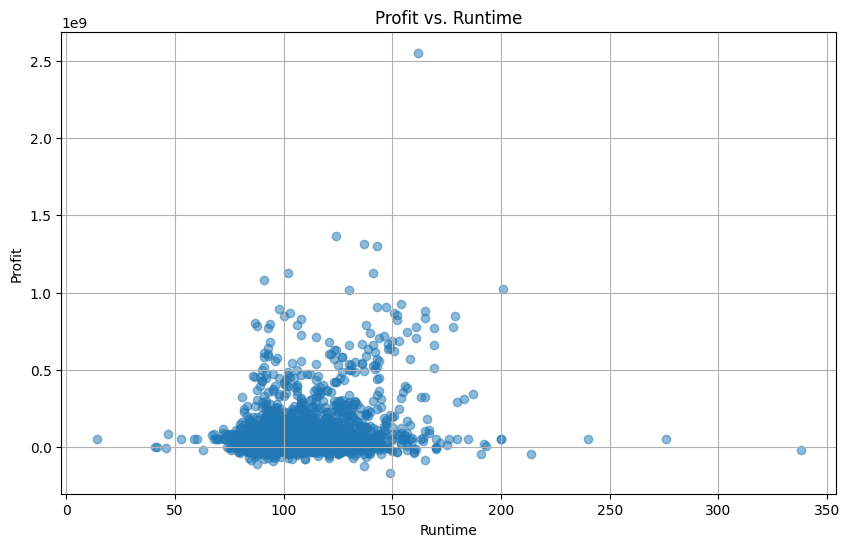

In [633]:
correlation_coefficient = df_v1['runtime'].corr(df_v1['profit'])
print(correlation_coefficient)

# Assuming df_v1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_v1['runtime'], df_v1['profit'], alpha=0.5)
plt.title('Profit vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


**From the above calculations and the overall trend, we decided the ranges**

**a. 0-80 for short movies**

**b. 80-140 for medium movies**

**c. Greater than 140 for long movies**

**5. Divide the dataset in 3 different subsets according to the above defined ranges for runtime**

0.09259705263777722


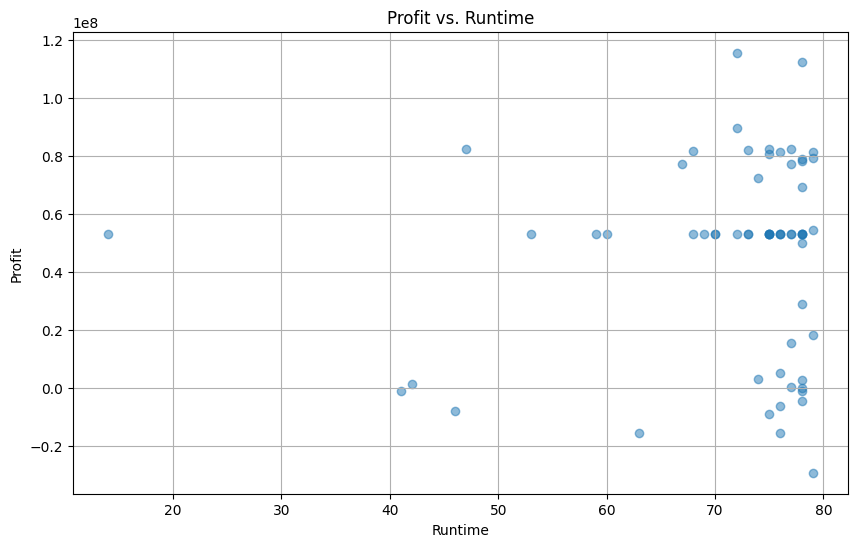

In [639]:
# Form a dataset for short movies
df_v2 = df_v1.query('runtime < 80')

correlation_coefficient = df_v2['runtime'].corr(df_v1['profit'])
print(correlation_coefficient)

# Assuming df_v1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_v2['runtime'], df_v2['profit'], alpha=0.5)
plt.title('Profit vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


0.10620046947868586


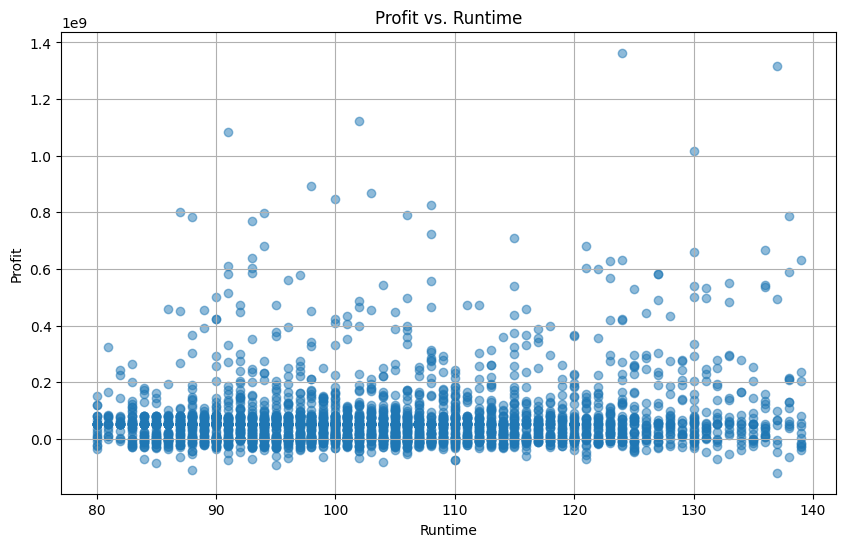

In [642]:
# Form a dataset for medium movies
df_v3 = df_v1.query('(runtime >= 80) & (runtime <140)')

correlation_coefficient = df_v3['runtime'].corr(df_v1['profit'])
print(correlation_coefficient)

# Assuming df_v1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_v3['runtime'], df_v3['profit'], alpha=0.5)
plt.title('Profit vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


-0.04670203199437174


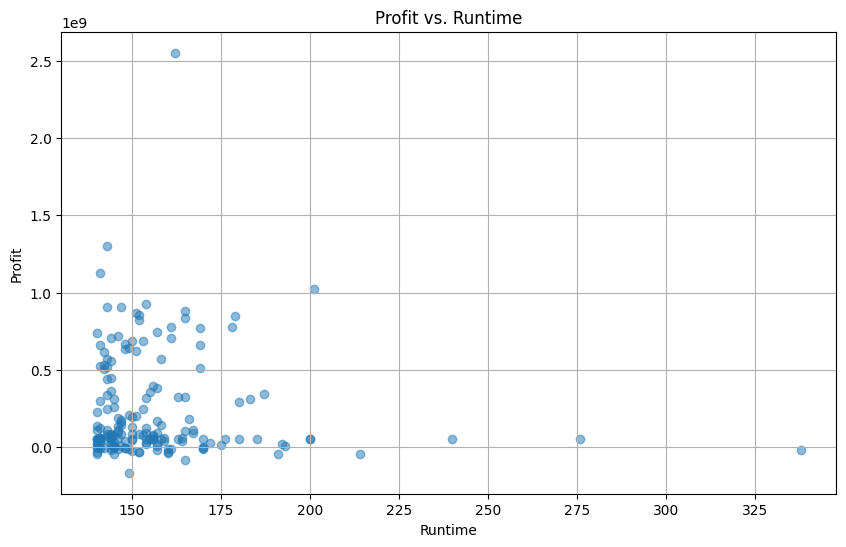

In [643]:
# Form a dataset for long movies
df_v4 = df_v1.query('runtime >= 140')

correlation_coefficient = df_v4['runtime'].corr(df_v1['profit'])
print(correlation_coefficient)

# Assuming df_v1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_v4['runtime'], df_v4['profit'], alpha=0.5)
plt.title('Profit vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


there is no correlation between runtime and profit
